In [3]:
# 下载一个预训练的，在完整的ImageNet数据集上训练的152层的ResNet模型
# 该模型尽量不要使用以下代码下载，耗时极长，下载速度极慢，直接用下载器下载更方便。
# 预训练模型包含两部分，包含模型定义的json文件和包含参数的二进制文件。 此外，还可能有一个用于标签的文本文件。
import mxnet as mx
path='http://data.mxnet.io/models/imagenet-11k/'
[mx.test_utils.download(path+'resnet-152/resnet-152-symbol.json'),
 mx.test_utils.download(path+'resnet-152/resnet-152-0000.params'),
 mx.test_utils.download(path+'synset.txt')]

ProxyError: HTTPConnectionPool(host='127.0.0.1', port=58389): Max retries exceeded with url: http://data.mxnet.io/models/imagenet-11k/synset.txt (Caused by ProxyError('Cannot connect to proxy.', RemoteDisconnected('Remote end closed connection without response',)))

In [1]:
# 载入下载的模型
# 模型保存路径在我的电脑上是：C:\Users\zhaoyu\Documents\
import mxnet as mx
sym, arg_params, aux_params = mx.model.load_checkpoint('C:/Users/zhaoyu/Documents/resnet-152', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('C:/Users/zhaoyu/Documents/synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

In [2]:
# 定义帮助函数下载图片并预测
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def get_image(path, show=False):
    # download and show the image
    # fname = mx.test_utils.download(url)
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(path):
    
    img = get_image(path, show=True)
    # 使用forward方法预测概率
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:10]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

probability=0.260933, class=n02123917 Burmese cat
probability=0.220975, class=n02124075 Egyptian cat
probability=0.085448, class=n02121620 cat, true cat
probability=0.080606, class=n02121808 domestic cat, house cat, Felis domesticus, Felis catus
probability=0.053299, class=n01318381 head
probability=0.040164, class=n02120997 feline, felid
probability=0.036720, class=n02122430 mouser
probability=0.032871, class=n04962062 ash grey, ash gray, silver, silver grey, silver gray
probability=0.027440, class=n02122298 kitty, kitty-cat, puss, pussy, pussycat
probability=0.018929, class=n01318894 pet


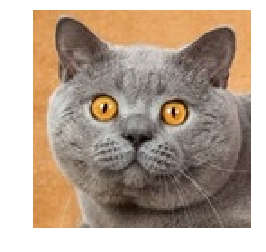

In [4]:
# 预测
# predict("C:/Users/zhaoyu/Desktop/Pug-Cookie-1920x1080-1024x576.jpg")
predict("C:/Users/zhaoyu/Desktop/cat.jpg")
